In [138]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import codecs
from matplotlib.gridspec import GridSpec
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, precision_score, recall_score

%matplotlib inline

In [17]:
titanic = pandas.read_csv('train.csv', sep=',', index_col='PassengerId')

In [19]:
# 1А ЖЕНЩИНЫ VS. МУЖЧИНЫ

In [46]:
sexsur = titanic.groupby(['Sex', 'Survived']).size().unstack()

In [47]:
print(sexsur)

Survived   0   1
Sex             
female     6  82
male      54  41


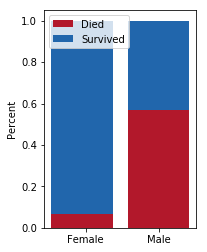

In [44]:
red, blue = '#B2182B', '#2166AC'
sexsur = (1. * sexsur.T / sexsur.T.sum()).T
plt.subplot(121)
plt.bar([0, 1], sexsur[0], color=red, label='Died')
plt.bar([0, 1], sexsur[1], bottom=sexsur[0], color=blue, label='Survived')
plt.xticks([0.05, 1], ['Female', 'Male'], rotation='horizontal')
plt.ylabel("Percent")
plt.xlabel("")
plt.legend(loc='upper left')

In [25]:
# Из диаграммы видно, что погибло меньше 10% всех женщин на корабле, но больше половины мужчин.

In [26]:
# 1Б 1-Й класс VS. 2-Й КЛАСС VS. 3-Й КЛАСС

In [48]:
classsur = titanic.groupby(['Pclass', 'Survived']).size().unstack()

In [49]:
print(classsur)

Survived   0    1
Pclass           
1         52  106
2          3   12
3          5    5


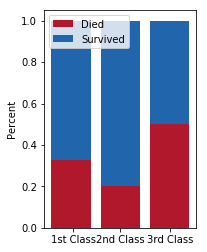

In [43]:
red, blue = '#B2182B', '#2166AC'
classsur = (1. * classsur.T / classsur.T.sum()).T
plt.subplot(121)
plt.bar([0, 1, 2], classsur[0], color=red, label='Died')
plt.bar([0, 1, 2], classsur[1], bottom=classsur[0], color=blue, label='Survived')
plt.xticks([0.05, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Percent")
plt.xlabel("")
plt.legend(loc='upper left')

In [50]:
# Из диаграммы видно, что погибло чуть больше 30% пассажиров первого класс.
# Что интересно, так как их второго класса погибло меньше в процентном соотношении - примерно 20%.
# Из третьего класса погибла половина пассажиров.

In [51]:
# 1В СТОИМОСТЬ БИЛЕТА В ЗАВИСИМОСТИ ОТ СОЦИАЛЬНО-ЭКОНОМИЧЕСКОГО КЛАССА

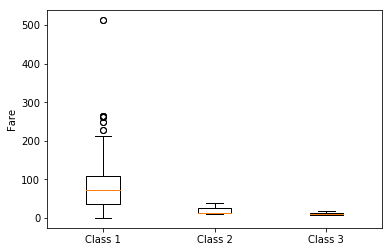

In [53]:
class1 = titanic.query('Pclass == 1')['Fare']
class2 = titanic.query('Pclass == 2')['Fare']
class3 = titanic.query('Pclass == 3')['Fare']
classprice = [class1, class2, class3]

c = plt.figure()
a = c.add_subplot(111)
b = a.boxplot(classprice, showfliers=True)
a.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
a.set_ylabel('Fare')
 
plt.show()

In [54]:
# In general, tickets for the first class are the most expensive, 
# tickets for second class cabins are somewhere in the middle
# and tickets for third class cabins are the cheapest.
# Though the difference between second class tickets and third class tickets isn't that drastic. 
# But the fist class tickets are noticeably more expensive.
# Also three passengers bought their ticket for a first class cabin for $5123292. They all survived.

In [55]:
# 2 СРАВНЕНИЕ ПО ПОЛУ И КЛАССУ

In [59]:
import seaborn as sns

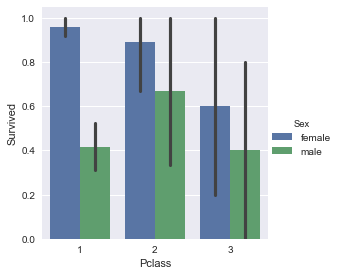

In [61]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic, kind="bar")

In [62]:
# Во все трех классах больше вижило жещин чем мужчин в процентном соотношении.
# Однако больший процент мужчин выжил во втором классе чем в первом. 
# В первом классе процент выживания для мужчин почти такой-же как в третьем классе.

In [63]:
# 3 ЧИСТКА

In [66]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
features = ['Pclass', 'Fare', 'Age', 'Sex']
titanic['Sex'] = titanic['Sex'].map(lambda sex: 1 if sex == 'male' else 0)
X, y = titanic[features], titanic['Survived']

In [67]:
X.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
2,1,71.2833,38.0,0
4,1,53.1000,35.0,0
7,1,51.8625,54.0,1
11,3,16.7000,4.0,0
12,1,26.5500,58.0,0


In [68]:
# 4 ДЕРЕВО РЕШЕНИЙ

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print(classification_report(y_test, y_pred_clf))

             precision    recall  f1-score   support

          0       0.68      0.72      0.70        18
          1       0.86      0.84      0.85        37

avg / total       0.80      0.80      0.80        55



In [106]:
splits = [3, 4, 5, 6, 7, 8, 9, 10]
leaves = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = {}
for s in splits:
    for l in leaves:
        result = []
        clf1 = DecisionTreeClassifier(min_samples_split=s, min_samples_leaf=l)
        clf1.fit(X_train, y_train)
        y_pred_clf1 = clf1.predict(X_test)
        result.append(precision_score(y_test, y_pred_clf1))
        result.append(recall_score(y_test, y_pred_clf1))
        result.append(f1_score(y_test, y_pred_clf1))
        results[str(s) + ' and ' + str(l)] = result
        print(str(s) + ' and ' + str(l))
        print(classification_report(y_test, y_pred_clf1))

3 and 1
             precision    recall  f1-score   support

          0       0.58      0.78      0.67        18
          1       0.87      0.73      0.79        37

avg / total       0.78      0.75      0.75        55

3 and 2
             precision    recall  f1-score   support

          0       0.62      0.72      0.67        18
          1       0.85      0.78      0.82        37

avg / total       0.78      0.76      0.77        55

3 and 3
             precision    recall  f1-score   support

          0       0.60      0.67      0.63        18
          1       0.83      0.78      0.81        37

avg / total       0.75      0.75      0.75        55

3 and 4
             precision    recall  f1-score   support

          0       0.56      0.78      0.65        18
          1       0.87      0.70      0.78        37

avg / total       0.77      0.73      0.74        55

3 and 5
             precision    recall  f1-score   support

          0       0.65      0.61      0.63    

In [108]:
report = pandas.DataFrame(results, index=['precision', 'recall', 'f1_score'], columns=results.keys())

In [ ]:
# Лучше всего дерево работает, когда min_samples_leaf = 7, и не важно чему равен min_samples_split.
# Поэтому попробуем с min_samples_leaf = 7, но с изменением min_samples_split

In [125]:
results2 = {}
for s in splits:
    result2 = []
    clf2 = DecisionTreeClassifier(min_samples_split=s, min_samples_leaf=7)
    clf2.fit(X_train, y_train)
    y_pred_clf2 = clf2.predict(X_test)
    result2.append(precision_score(y_test, y_pred_clf2))
    result2.append(recall_score(y_test, y_pred_clf2))
    result2.append(f1_score(y_test, y_pred_clf2))
    results2[s] = result2

In [126]:
report2 = pandas.DataFrame(results2, index=['precision', 'recall', 'f1_score'], columns=results2.keys())
print(report2)

                 3         4         5         6         7         8   \
precision  0.909091  0.909091  0.909091  0.909091  0.909091  0.909091   
recall     0.810811  0.810811  0.810811  0.810811  0.810811  0.810811   
f1_score   0.857143  0.857143  0.857143  0.857143  0.857143  0.857143   

                 9         10  
precision  0.909091  0.909091  
recall     0.810811  0.810811  
f1_score   0.857143  0.857143  


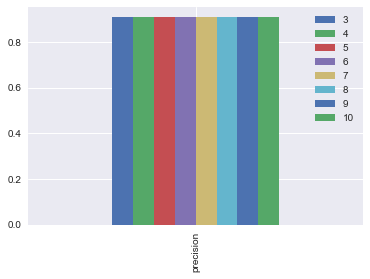

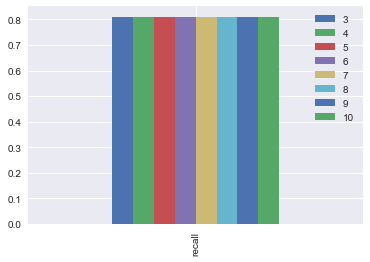

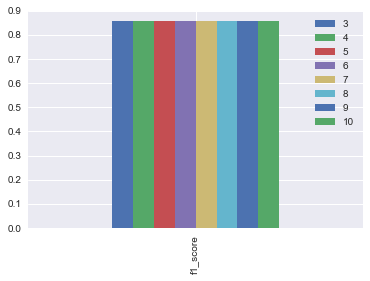

In [141]:
report2[0:1].plot.bar()
report2[1:2].plot.bar()
report2[2:3].plot.bar()

In [130]:
# Вот на диаграммах видно что результаты одинаковые, век зависимости min_samples_split.
# Для построения дерева мы возьмем тогда min_samples_split = 3

In [182]:
from sklearn.tree  import export_graphviz
import graphviz

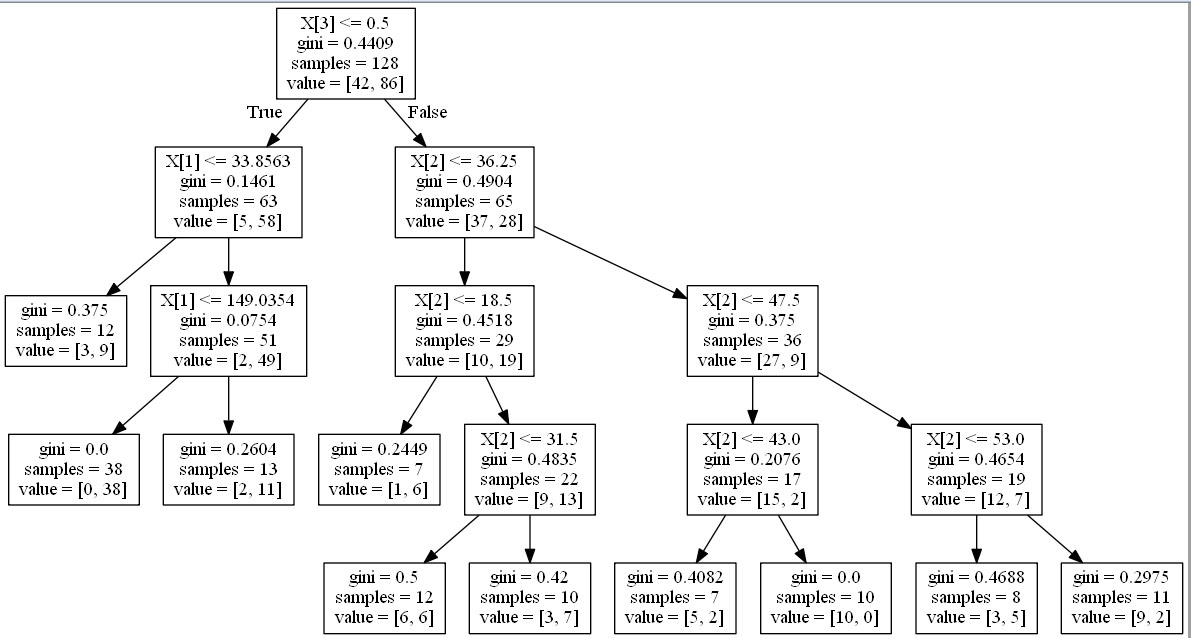

In [190]:
clf3 = DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=7)
clf3.fit(X_train, y_train)
y_pred_clf3 = clf3.predict(X_test)
dotfile = open('tree.dot', 'w')
export_graphviz(clf3, out_file=dotfile) 
dotfile.close()
#f = open("tree.dot")
#graph = f.read()
#tree = graphviz.Source(graph)
#f.close()
#tree.view()

from IPython.display import Image
Image("tree.jpg")

# Я добавила в переменные среды путь к graphviz в анаконде, но он все равно не видит. Поэтому я просто открылв
# в программе этот файл, сохранила как картинку и на экран вывела.

In [90]:
# 5 ЛЕС РЕШЕНИЙ

In [167]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

             precision    recall  f1-score   support

          0       0.59      0.72      0.65        18
          1       0.85      0.76      0.80        37

avg / total       0.76      0.75      0.75        55



In [173]:
estimators = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
results3 = {}
for e in estimators:
    result3 = []
    rf1 = RandomForestClassifier(n_estimators=e)
    rf1.fit(X_train, y_train)
    y_pred_rf1 = rf1.predict(X_test)
    result3.append(precision_score(y_test, y_pred_rf1))
    result3.append(recall_score(y_test, y_pred_rf1))
    result3.append(f1_score(y_test, y_pred_rf1))
    results3[e] = result3
    print('Estimators = ' + str(e))
    print(classification_report(y_test, y_pred_rf1))
    print('')

Estimators = 10
             precision    recall  f1-score   support

          0       0.71      0.67      0.69        18
          1       0.84      0.86      0.85        37

avg / total       0.80      0.80      0.80        55


Estimators = 15
             precision    recall  f1-score   support

          0       0.67      0.67      0.67        18
          1       0.84      0.84      0.84        37

avg / total       0.78      0.78      0.78        55


Estimators = 20
             precision    recall  f1-score   support

          0       0.68      0.72      0.70        18
          1       0.86      0.84      0.85        37

avg / total       0.80      0.80      0.80        55


Estimators = 25
             precision    recall  f1-score   support

          0       0.65      0.61      0.63        18
          1       0.82      0.84      0.83        37

avg / total       0.76      0.76      0.76        55


Estimators = 30
             precision    recall  f1-score   support

  

In [178]:
report3 = pandas.DataFrame(results3, index=['precision', 'recall', 'f1_score'], columns=results3.keys())
print(report3)

                10        15        20        25        30        35   \
precision  0.842105  0.837838  0.861111  0.815789  0.857143  0.861111   
recall     0.864865  0.837838  0.837838  0.837838  0.810811  0.837838   
f1_score   0.853333  0.837838  0.849315  0.826667  0.833333  0.849315   

                40        45        50        55        60        65   \
precision  0.861111  0.861111  0.885714  0.885714  0.861111  0.861111   
recall     0.837838  0.837838  0.837838  0.837838  0.837838  0.837838   
f1_score   0.849315  0.849315  0.861111  0.861111  0.849315  0.849315   

                70        75        80        85        90        95   \
precision  0.861111  0.861111  0.885714  0.885714  0.885714  0.837838   
recall     0.837838  0.837838  0.837838  0.837838  0.837838  0.837838   
f1_score   0.849315  0.849315  0.861111  0.861111  0.861111  0.837838   

                100  
precision  0.861111  
recall     0.837838  
f1_score   0.849315  


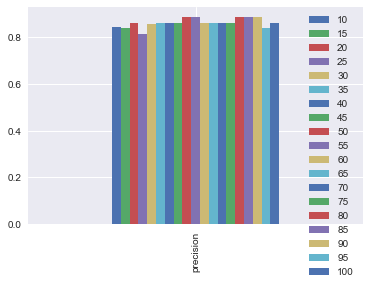

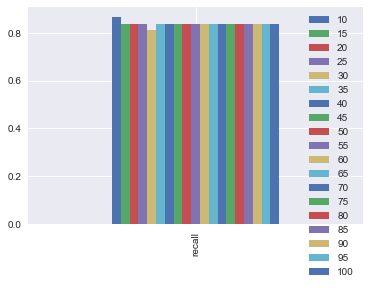

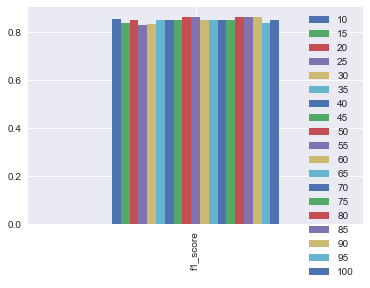

In [177]:
report3[0:1].plot.bar()
report3[1:2].plot.bar()
report3[2:3].plot.bar()

In [140]:
# Лучше всего лес работает, когда n_estimators = 50, 55, 85, 90, 95. Этот лес мы и построим.

In [165]:
# Лучший лес работает немножко хуже чем лучшее дерево.

In [179]:
rf2 = RandomForestClassifier(n_estimators=95)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
print('Best Decision Tree')
print(classification_report(y_test, y_pred_clf3))
print('Best Random Forest')
print(classification_report(y_test, y_pred_rf2))

Best Decision Tree
             precision    recall  f1-score   support

          0       0.68      0.83      0.75        18
          1       0.91      0.81      0.86        37

avg / total       0.83      0.82      0.82        55

Best Random Forest
             precision    recall  f1-score   support

          0       0.70      0.78      0.74        18
          1       0.89      0.84      0.86        37

avg / total       0.82      0.82      0.82        55

